<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/Module_15_04_YOLOv8_OPENCV_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Object Detection using YOLOv8 and YOLOv9

In this module, we will learn how to use YOLOv8 and YOLOv9 with OpenCV-DNN.

## What is YOLOv8 ?

**YOLOv8 is one of the finest SOTA object detection model of YOLO series.**

Leveraging the previous YOLO versions, **the YOLOv8 model is faster and more accurate** while providing a unified framework for training models for performing

* Object Detection
* Instance Segmentation
* Image Classification


---

<img src="https://learnopencv.com/wp-content/uploads/2023/12/yolov8-architecture-scaled-1.jpg" width="600" hight="400">

---
[Ultralytics](https://github.com/ultralytics/ultralytics) has released a completely new repository for YOLOv8 Models. The authors haven't shared the model architecture, but here is one from their official GitHub issues. You can visit [here](https://github.com/ultralytics/ultralytics/issues/189) for more details.


## What is YOLOv9 ?

**YOLOv9 is one of the latest model of YOLO family.**

Leveraging the previous YOLO versions, **the YOLOv9 introduces PGI and GELAN into the classic YOLO architecture.**

* **Programmable Gradient Information(PGI)**: PGI is a technique for generating more reliable gradients using auxiliary reversible branches. It is effective for all model sizes, from lightweight to large.
* **Generalized Efficient Layer Aggregation Network (GELAN)**: GELAN, the backbone of YOLOv9, is a new architecture that enhances flexibility by allowing interchangeable computational blocks, provides depth-wise parametrization for efficient resource usage, and ensures stable performance across various configurations with different block types and depths for scalable object detection.


---

<img src="https://learnopencv.com/wp-content/uploads/2024/07/yolov9-model-architecture-1.png" width="600" hight="400">

---
[Ultralytics](https://github.com/ultralytics/ultralytics) now integrated YOLOv9 into their codebase. The authors haven't shared the complete model architecture, but here is an architecture of YOLOv9 from their official GitHub issues; you can visit [here](https://github.com/WongKinYiu/yolov9/issues/355) for more details.

## YOLOv10 Integration
**YOLOv10 is the latest iteration of the YOLO Series.** We have identified a slight compatibility issue between YOLOv10 and the OpenCV DNN module concerning ONNX operator layers(As YOLOv10 removed NMS from the code pipeline and uses TopK). We will update the notebook with YOLOv10 shortly once a solution is available.


## Install Required Libraries

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install ultralytics==8.2.80 -q
!pip install opencv-python==4.10.0.84 -q
!pip install matplotlib -q
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.80 🚀 Python-3.10.0 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 7974MiB)
Setup complete ✅ (16 CPUs, 15.3 GB RAM, 216.1/596.0 GB disk)


### Our code pipleline follows:

* Ultralytics to load the YOLO models.
* OpenCV DNN module requires the model to be in ONNX(.onnx) format.
* So, we convert the models into Onnx format using ultralytics onnx exporter.
* Process the onnx models with OpenCV DNN to get predictions.

## Import Libraries

First, we will import all the libraries we will use:

* **OpenCV and Numpy** - To do all the pre-processing with inputs and post-processing with detections.
* **Matplotlib** - To visualize the results.
* **Ultralytics** - To load the YOLO Models and COCO Class Names and Convert the models to ONNX format.

In [ ]:
import os
import numpy as np
import cv2
import sys
import time
import requests
import zipfile
from os import path
import matplotlib.pyplot as plt
%matplotlib inline

from ultralytics.utils import yaml_load
from ultralytics.utils.checks import check_yaml

### Function to Download the Data

In [ ]:
def download_and_unzip(dropbox_link):
    '''
    Download and unzip Airplane Images Dataset.

    params:
          dropbox_link (str): Download link for source dataset.
    '''
    # Set the output directory path
    output_dir = '.'

    # Extract the filename from the Dropbox link
    filename = dropbox_link.split('/')[-1]

    # Download the zip file
    response = requests.get(dropbox_link)
    zip_path = os.path.join(output_dir, filename)
    with open(zip_path, 'wb') as f:
        f.write(response.content)

    # Extract the contents of the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

    # Remove the zip file
    os.remove(zip_path)

    # Print success message
    print(f"Zip file downloaded and extracted to: {output_dir}")

In [ ]:
# Function call to dowload_and_unzip() - ORIGINAL DATASET
dropbox_link = "https://www.dropbox.com/scl/fi/exg6o6greg7cp2uq98wll/yolov8-opencvdnn.zip?rlkey=2br0c8r1fjrqgyf6i362xfxrd&st=9lmmh6t5&dl=1"

download_and_unzip(dropbox_link)

Zip file downloaded and extracted to: .


## YOLOv8 and YOLOv9

#### Also we set the additional Matplotlib parameters to visulize out detections.

In [ ]:
# Setting the parameters for result visualization
plt.rcParams['figure.figsize'] = (15.0,15.0)
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

### Download and Export the YOLOv8 model to ONNX

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8s.pt") # change according to your need between YOLOv8 and YOLOv9 both will works

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

100%|██████████| 21.5M/21.5M [00:00<00:00, 141MB/s] 


Ultralytics YOLOv8.2.80 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

PyTorch: starting from 'yolov8s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 263.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 7.5s, saved as 'yolov8s.onnx' (42.8 MB)

Export complete (10.6s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8s.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8s.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8s.onnx'

### Initialize the parameters
The YOLO algorithm generates bounding boxes as the predicted detection outputs. Every predicted box is associated with a confidence score. In the first stage, all the boxes below the confidence threshold parameter are ignored for further processing.

Every detection also has a class scores associated with it. Class scores are the probability of the detection being the object from the dataset it is trained on. YOLOv8 and YOLOv9 is trained on COCO dataset which has 80 classes.

Each object can have multiple bounding boxes. Since we need only one, rest of the boxes are passed through non-maximum suppression. **Non-maximum suppression** is controlled by a parameter **NMS_THRESHOLD**. You can try to change these values and see how the number of output predicted boxes changes.

Next, the default values for the input width (**INPUT_WIDTH**) and height (**INPUT_HEIGHT**) for the network’s input image are set. We set each of them to 640 (default). You can use smaller size(Multiple of 32) to increase the speed.


In [ ]:
# Constants
INPUT_WIDTH = 640             # Width of network's input image, larger is slower but more accurate
INPUT_HEIGHT = 640            # Height of network's input image, larger is slower but more accurate
CONFIDENCE_THRESHOLD = 0.5    # Confidence threshold, high values filter out low confidence detections
NMS_THRESHOLD = 0.4           # Non-maximum suppression threshold, higher values result in duplicate boxes per object

In [ ]:
# Text parameters.
FONT_FACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 1
THICKNESS = 2

In [ ]:
# Load the class names from the COCO dataset
CLASSES = yaml_load(check_yaml("coco8.yaml"))["names"]

# Display all the CLASSES
for i in CLASSES.values():
  print(i)

# Generate a color palette for the classes
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


### **Functions to process the Input**

The `draw_detections` function visually annotates an image with bounding boxes and labels to identify and display detected objects based on their positions and classifications. It takes the image, bounding box coordinates, confidence score, and class ID for each detected object as input parameters. The function uses these inputs to draw a bounding box around each object and superimposes a label on the image that includes the object's class name and its confidence score.

In [ ]:
def draw_detections(img, box, score, class_id):

    # Extract the coordinates of the bounding box
    x1, y1, w, h = box

    # Retrieve the color for the class ID
    color = COLORS[class_id]

    # Draw the bounding box on the image
    cv2.rectangle(img, (int(x1), int(y1)), (int(x1 + w), int(y1 + h)), color, 2)

    # Create the label text with class name and score
    label = f"{CLASSES[class_id]}: {score:.2f}"

    # Calculate the dimensions of the label text
    (label_width, label_height), _ = cv2.getTextSize(label, FONT_FACE, FONT_SCALE, THICKNESS)

    # Calculate the position of the label text
    label_x = x1
    label_y = y1 - 10 if y1 - 10 > label_height else y1 + 10

    # Draw a filled rectangle as the background for the label text
    cv2.rectangle(
        img, (label_x, label_y - label_height), (label_x + label_width, label_y + label_height), color, cv2.FILLED
    )

    # Draw the label text on the image
    cv2.putText(img, label, (label_x, label_y), FONT_FACE, FONT_SCALE, (0, 0, 0), THICKNESS, cv2.LINE_AA)


The `inference` function prepares the input image for object detection using OpenCV-DNN. It converts the image into a standardized format suitable for the model by creating a 4D blob—this involves resizing the image to specific dimensions (given by INPUT_WIDTH and INPUT_HEIGHT), normalizing pixel values by scaling them (here, dividing by 255 to scale between 0 and 1), and ensuring no color bias is added during this transformation. The function then sets this processed blob as the input to the neural network `(net)`. It initiates a forward pass of the network, which computes the outputs based on the provided input through the network's layers specified in `output_layers`. Finally, the function returns these computed outputs, which typically include detections.

In [ ]:
def inference(input_image, net):

    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(input_image, 1/255, (INPUT_WIDTH, INPUT_HEIGHT), [0,0,0], 1, crop=False)

    # Sets the input to the network.
    net.setInput(blob)

    # Runs the forward pass to get output of the output layers.
    output_layers = net.getUnconnectedOutLayersNames()
    image_data = net.forward(output_layers)

    # Return the preprocessed image data
    return image_data

The `postprocess` function handles the final step of object detection by processing the raw model outputs for an input image. It reshapes and normalizes the detection data, scales bounding box coordinates from the model's input resolution to the original image size, and filters detections based on a confidence threshold. It also performs non-maximum suppression to eliminate redundant, overlapping boxes. Finally, it annotates the input image with bounding boxes and class labels for each confirmed detection and returns the annotated image.

In [ ]:
def postprocess(input_image, output):

    # Transpose and squeeze the output to match the expected shape
    outputs = np.transpose(np.squeeze(output[0]))

    # Get the number of rows in the outputs array
    rows = outputs.shape[0]

    # Lists to store the bounding boxes, scores, and class IDs of the detections
    boxes = []
    scores = []
    class_ids = []

    img_height, img_width = input_image.shape[:2]

    # Calculate the scaling factors for the bounding box coordinates
    x_factor = img_width / INPUT_WIDTH
    y_factor = img_height / INPUT_HEIGHT

    # Iterate over each row in the outputs array
    for i in range(rows):
        # Extract the class scores from the current row
        classes_scores = outputs[i][4:]

        # Find the maximum score among the class scores
        max_score = np.amax(classes_scores)

        # If the maximum score is above the confidence threshold
        if max_score >= CONFIDENCE_THRESHOLD:
            # Get the class ID with the highest score
            class_id = np.argmax(classes_scores)

            # Extract the bounding box coordinates from the current row
            x, y, w, h = outputs[i][0], outputs[i][1], outputs[i][2], outputs[i][3]

            # Calculate the scaled coordinates of the bounding box
            left = int((x - w / 2) * x_factor)
            top = int((y - h / 2) * y_factor)
            width = int(w * x_factor)
            height = int(h * y_factor)

            # Add the class ID, score, and box coordinates to the respective lists
            class_ids.append(class_id)
            scores.append(max_score)
            boxes.append([left, top, width, height])

    # Apply non-maximum suppression to filter out overlapping bounding boxes
    indices = cv2.dnn.NMSBoxes(boxes, scores, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

    # Iterate over the selected indices after non-maximum suppression
    for i in indices:
        # Get the box, score, and class ID corresponding to the index
        box = boxes[i]
        score = scores[i]
        class_id = class_ids[i]

        # Draw the detection on the input image
        draw_detections(input_image, box, score, class_id)

    # Return the modified input image
    return input_image

### Function to put efficiency information

The `put_efficiency` function is used to show how fast the model is processing images or video frames by adding a label directly on the output. If you're processing a video, the function calculates the FPS (frames per second) by taking `1 / inference_time`, which tells you how many frames are being processed every second. If you're processing a single image, it converts the `inference_time` from seconds to milliseconds by multiplying it by `1000.0`. This label is then drawn onto the image or frame using OpenCV’s `cv2.putText `function, which allows you to see how quickly the model is working directly on the output.

In [ ]:
def put_efficiency(input_img, inference_time, is_video=False):
    if is_video:
        # Calculate FPS based on inference time
        fps = 1 / inference_time
        label = 'FPS: %.2f' % fps
    else:
        # Convert the timing information to milliseconds and create a label string
        label = 'Inference Time: %.2f ms' % (inference_time * 1000.0)

    # Print the efficiency information to the console
    # print(label)

    # Display the efficiency information on the input image
    cv2.putText(input_img, label, (10, 50), FONT_FACE, FONT_SCALE, (0, 255, 0), THICKNESS, cv2.LINE_AA)

### Image Inference

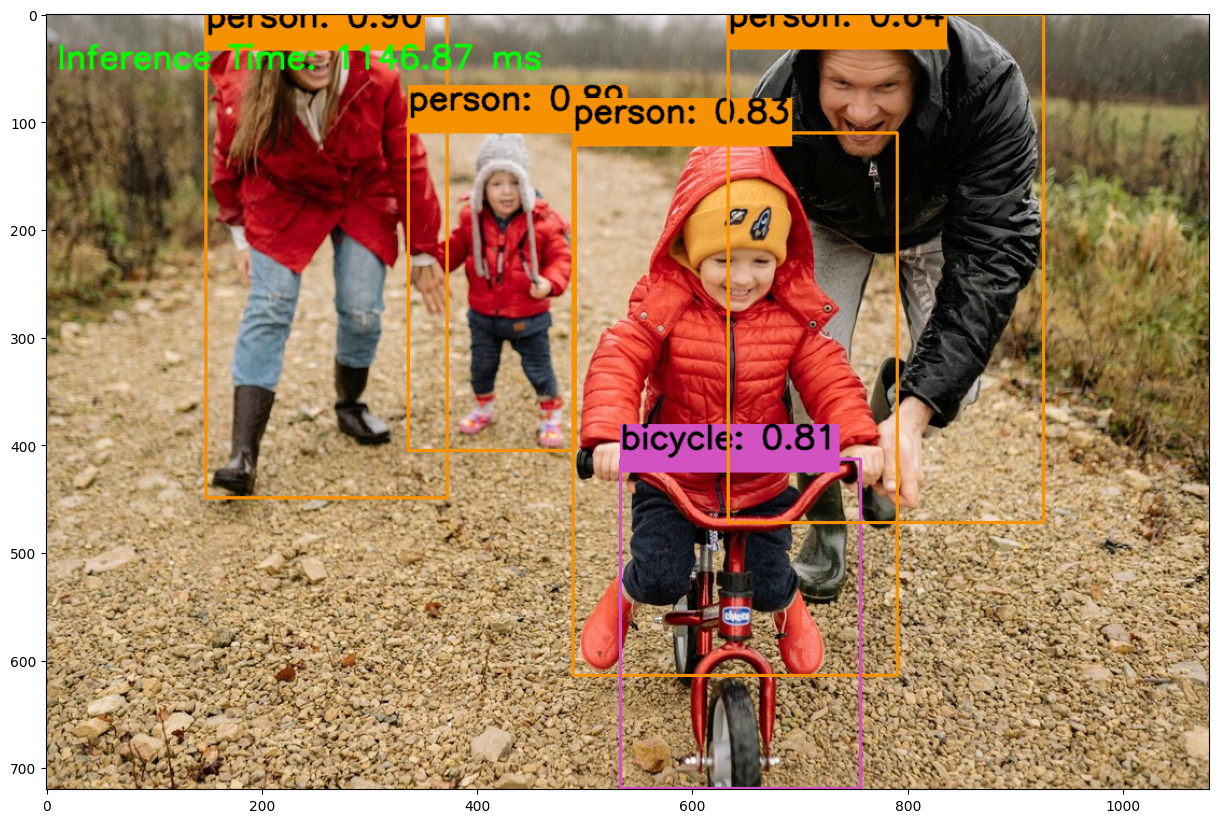

In [ ]:
#Load the Image
frame = cv2.imread('family.jpg', cv2.IMREAD_UNCHANGED)

# Load the network.
model = "yolov8s.onnx"
net = cv2.dnn.readNetFromONNX(model)

# Start the timer
start_time = time.time()

# Process image.
detections = inference(frame, net)

# Measure inference time
inference_time = time.time() - start_time

# Do the Post processing
img = postprocess(frame.copy(), detections)

# Put efficiency information.
put_efficiency(img, inference_time, is_video=False)

# save the final image
cv2.imwrite('result.jpg', img)

plt.imshow(img[...,::-1]);

### Video Inference

In [ ]:
# Load the network
model = "yolov8s.onnx"
net = cv2.dnn.readNetFromONNX(model)

# Video input
video_path = '/content/birds-side-view.mp4'  # replace with your video path
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
output_path = 'output_video.mp4'  # replace with your desired output path

# Initialize VideoWriter to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("End of video stream")
        break

    # Start the timer
    start_time = time.time()

    # Process each frame
    detections = inference(frame, net)

    # Measure inference time
    inference_time = time.time() - start_time

    # Do the post processing
    img = postprocess(frame.copy(), detections)

    # Calculate and display the FPS or inference time on the frame
    put_efficiency(img, inference_time, is_video=True)

    # Write the processed frame to the output video
    out.write(img)

    # Display the processed frame
    # cv2.imshow('YOLOv8 Object Detection', img)

    # Press 'q' to exit the video loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer, and close windows
cap.release()
out.release()
cv2.destroyAllWindows()

End of video stream


### Display the Result

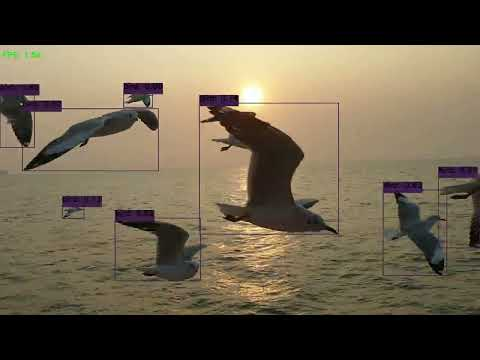

In [ ]:
# Step 1: Import the necessary function
from IPython.display import YouTubeVideo

# Step 2: Specify the YouTube video ID
video_id = 'HVJt-rh7FLs'  # Replace 'your_video_id' with the actual YouTube video ID

# Step 3: Display the video
display(YouTubeVideo(video_id, width=720, height=405))